# **MATPLOTLIB**

### LINE PLOT

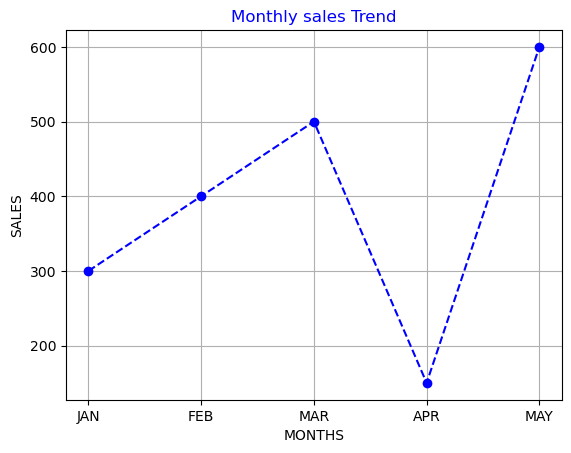

In [1]:
import matplotlib.pyplot as plt
months = ['JAN' , 'FEB' , 'MAR' ,'APR' , 'MAY' ]
sales = [300,400,500,150,600]
plt.plot(months,sales, color='blue', marker='o', linestyle='--')
plt.title("Monthly sales Trend",color='blue')
plt.xlabel("MONTHS")
plt.ylabel("SALES")
plt.grid(True)
plt.show()

### BAR CHART

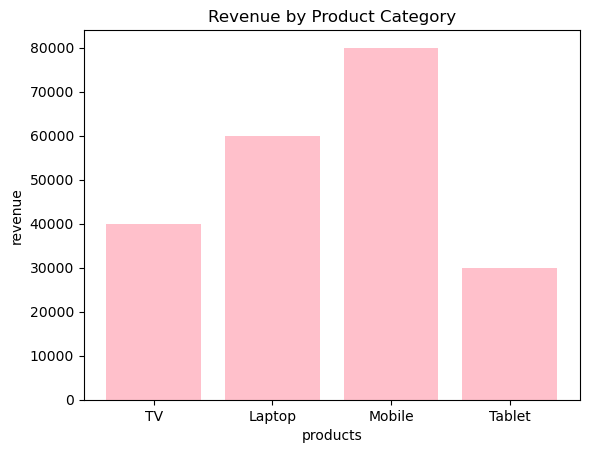

In [2]:
products = ['TV' , 'Laptop' , 'Mobile' , 'Tablet' ]
revenue = [40000,60000,80000,30000]
plt.bar(products,revenue,color = 'pink')
plt.title("Revenue by Product Category")
plt.xlabel("products")
plt.ylabel("revenue")
plt.show()

### SCATTER PLOT

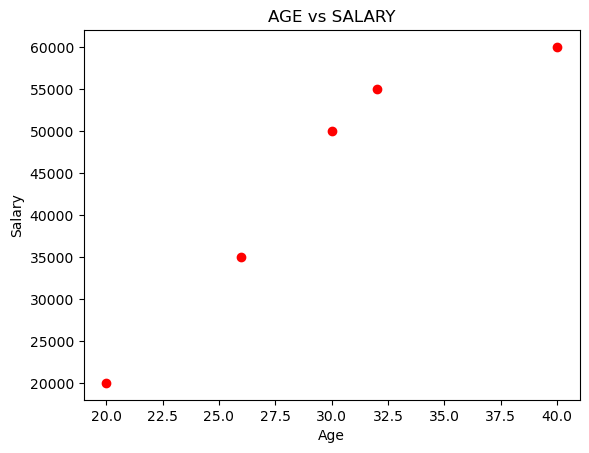

In [3]:
age = [20,26,40,30,32]
salary = [20000,35000,60000,50000,55000]
plt.scatter(age,salary,color='red')
plt.title("AGE vs SALARY")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

### PIE CHART

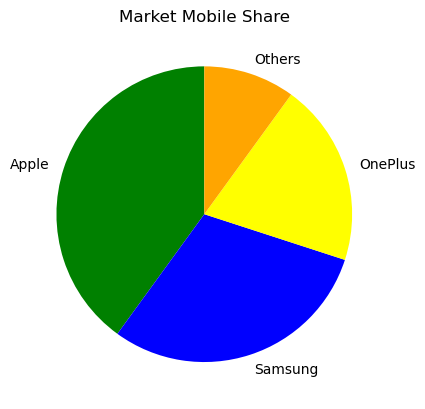

In [4]:
brands = ['Apple' , 'Samsung' ,'OnePlus' , 'Others']
market_share = [40,30,20,10]
colors=['green','blue','yellow','orange']
plt.pie(market_share,labels=brands,colors = colors,startangle=90)
plt.title("Market Mobile Share")
plt.show()

### HISTOGRAM

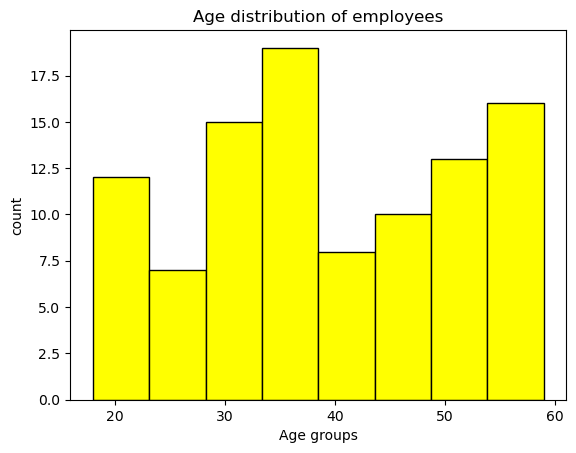

In [5]:
import numpy as np
ages = np.random.randint(18,60,100)
plt.hist(ages,bins=8,color = 'yellow',edgecolor='black')
plt.title("Age distribution of employees")
plt.xlabel("Age groups")
plt.ylabel("count")
plt.show()

### SUBPLOTS

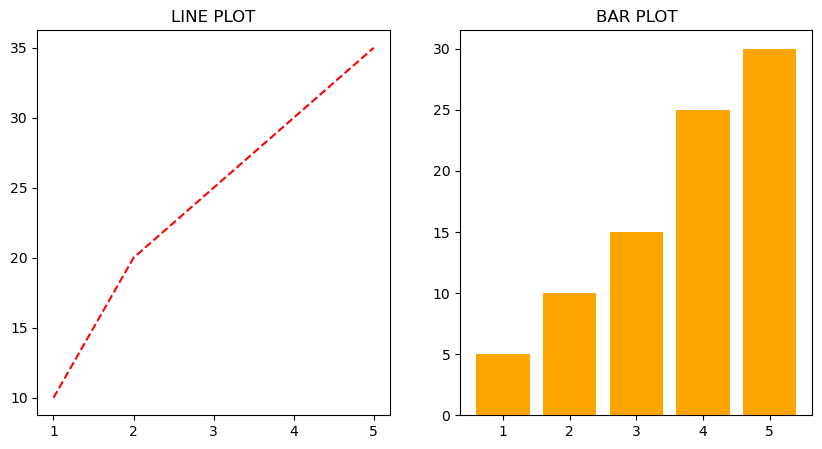

In [6]:
x=[1,2,3,4,5]
y1=[10,20,25,30,35]
y2=[5,10,15,25,30]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y1,'r--')
plt.title("LINE PLOT")
plt.subplot(1,2,2)
plt.bar(x,y2,color = 'orange')
plt.title("BAR PLOT")
plt.show()

### STYLES

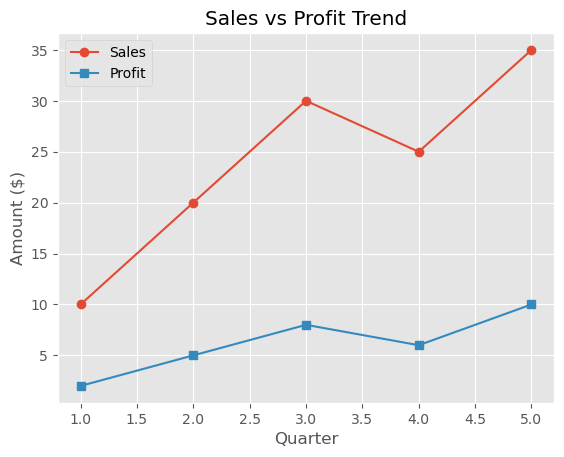

In [7]:
plt.style.use('ggplot')
x = [1, 2, 3, 4, 5]
sales = [10, 20, 30, 25, 35]
profit = [2, 5, 8, 6, 10]
plt.plot(x, sales, label='Sales', marker='o')
plt.plot(x, profit, label='Profit', marker='s')
plt.title("Sales vs Profit Trend")
plt.xlabel("Quarter")
plt.ylabel("Amount ($)")
plt.legend()
plt.savefig("sales_profit_chart.png")   # save the plot
plt.show()
 

### TASK
•  Inspect the dataset and list the number of rows, columns, data types, and any missing values.<br>
•  Remove duplicate rows (if any) and re-check the dataset — how many rows were removed?<br>
•  Parse the Date column to datetime, sort the data by date, and report how many rows (if any) have invalid/missing dates.<br>
•  Handle missing values in numeric columns (explain and apply a method you choose), then state which method you used and why.<br>

In [8]:
import pandas as pd
df =pd.read_csv(r"C:\Users\DELL\Downloads\data.csv")

In [9]:
rows,cols =df.shape
print(f"Number of rows : {rows}")
print(f"Number of columns: {cols}")
print(df.info())

Number of rows : 32
Number of columns: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB
None


In [10]:
print(f"Missing values per column: \n{df.isnull().sum()}")

Missing values per column: 
Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [11]:
before = len(df)
df = df.drop_duplicates()
after =len(df)
removed = before - after
print(f"Removed {removed} duplicate rows")

Removed 1 duplicate rows


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
invalid_dates = df['Date'].isnull().sum()
print(f"Number of invalid dates: {invalid_dates}")

Number of invalid dates: 1


In [13]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df[num_cols].isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [14]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print("Missing numeric values filled using the median method.")

Missing numeric values filled using the median method.


In [15]:
print(df[num_cols].isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


Create a line plot of Calories over Date (with markers, dashed line, grid, rotated x-ticks) and save the image as line_calories_over_time.png.

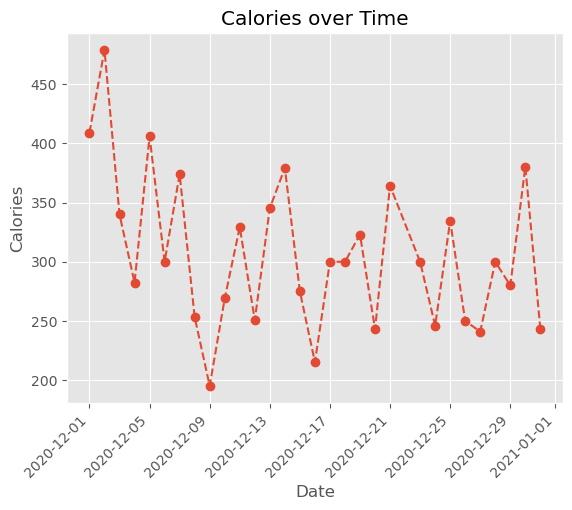

In [16]:
output_path = r"C:\Users\DELL\Downloads\line_calories_over_time.png"
plt.plot(df['Date'],df['Calories'],marker='o',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.title('Calories over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.savefig(output_path)
plt.show()


Group data by Duration (or sensible duration bins), compute the average Pulse per group, and draw a bar chart comparing average pulse across duration groups; save as bar_avg_pulse_by_duration.png.
 

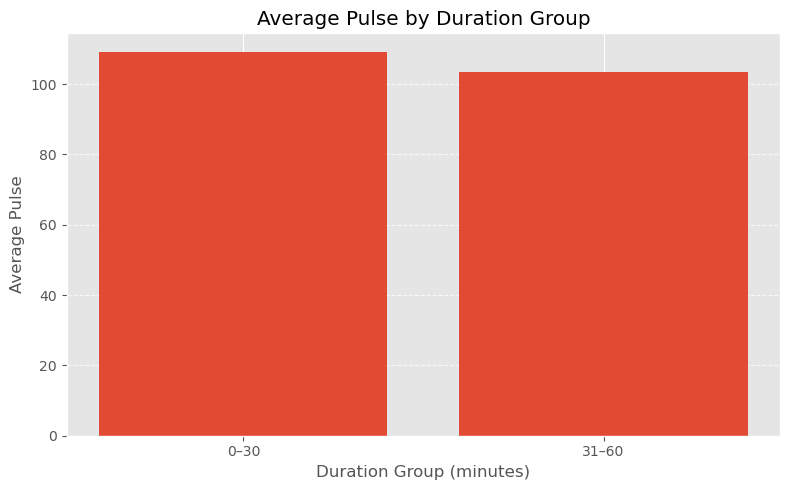

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.dropna(subset=['Duration', 'Pulse'])
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')

bins = [0, 30, 60, 90, 120, 180]
labels = ['0–30', '31–60', '61–90', '91–120', '121–180']
df['DurationGroup'] = pd.cut(df['Duration'], bins=bins, labels=labels, include_lowest=True)

avg_pulse = df.groupby('DurationGroup', observed=False)['Pulse'].mean().reset_index()

output_path = r"C:\Users\DELL\Downloads\bar_avg_pulse_by_duration.png"
plt.figure(figsize=(8,5))
plt.bar(avg_pulse['DurationGroup'], avg_pulse['Pulse'])
plt.xlabel('Duration Group (minutes)')
plt.ylabel('Average Pulse')
plt.title('Average Pulse by Duration Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()


### TASK
•  Plot a scatter plot of Duration vs Calories, compute the Pearson correlation coefficient, and add a linear trend line to the scatter; save as `scatter_duration_vs_calories.png`.<br>
•  Create a pie chart showing the percentage breakdown of Maxpulse into ranges (e.g., <=120, 121–140, 141–160, >160) and save as `pie_maxpulse_ranges.png`.<br>
•  Plot a histogram of Calories with an appropriate number of bins, comment on shape/skewness, and save as `hist_calories.png`.<br>
•  Build a multi-panel subplot figure (1 row × 2 columns): left = line plot of Pulse over Date, right = scatter of Duration vs Maxpulse; save as `subplots_pulse_duration_maxpulse.png`.<br>
 

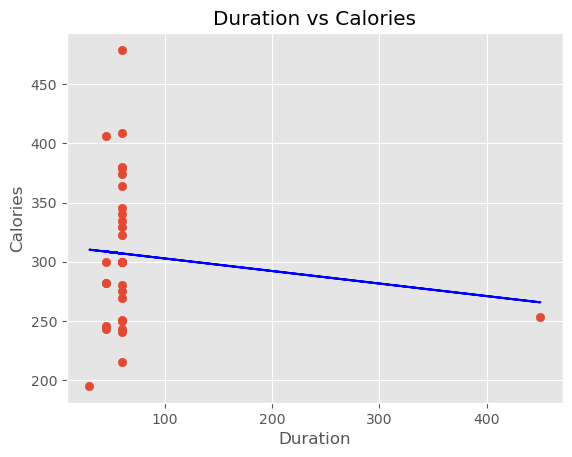

In [18]:
df_clean = df[['Duration','Calories']].dropna()
plt.scatter(df_clean['Duration'], df_clean['Calories'])
m, b = np.polyfit(df_clean['Duration'], df_clean['Calories'], 1)
plt.plot(df_clean['Duration'], m*df_clean['Duration'] + b, color='blue')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration vs Calories')
plt.savefig('scatter_duration_vs_calories.png')
plt.show()

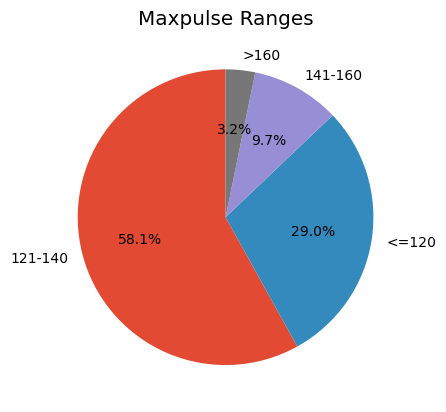

In [19]:
bins = [0, 120, 140, 160, 200]
labels = ['<=120','121-140','141-160','>160']
df['Maxpulse_range'] = pd.cut(df['Maxpulse'], bins=bins, labels=labels)
counts = df['Maxpulse_range'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Maxpulse Ranges')
plt.savefig('pie_maxpulse_ranges.png')
plt.show()

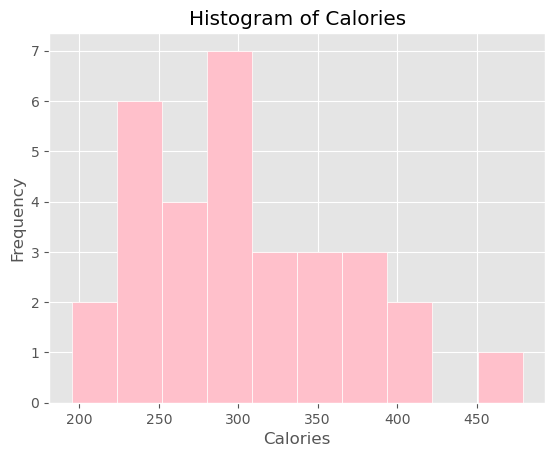

In [20]:
plt.hist(df['Calories'], bins=10,color='pink',edgecolor='white')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Histogram of Calories')
plt.savefig('hist_calories.png')
plt.show()

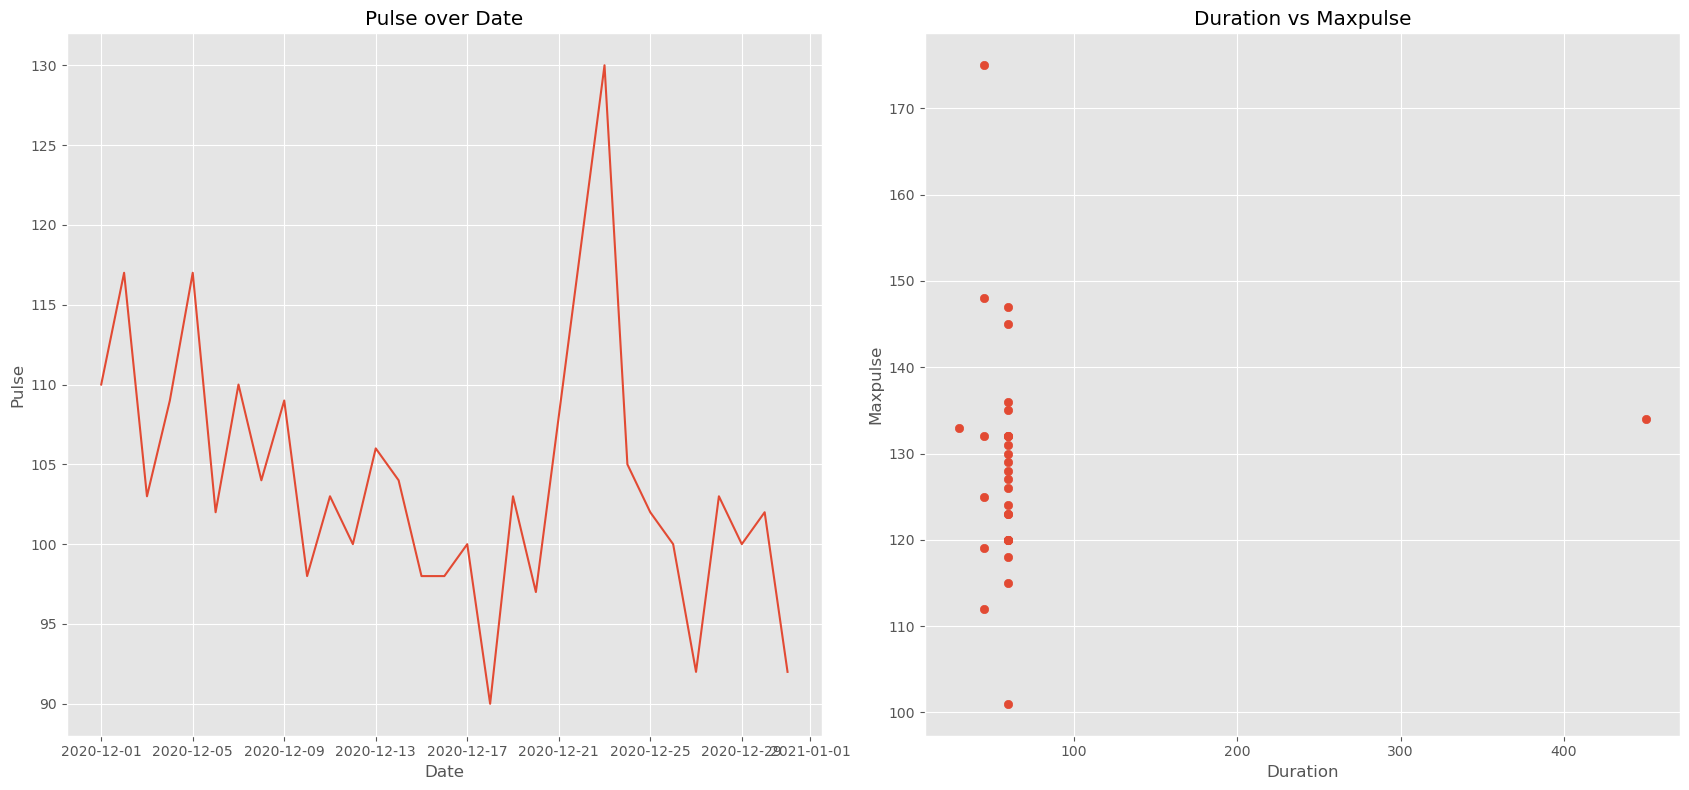

In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(df['Date'], df['Pulse'])
plt.xlabel('Date')
plt.ylabel('Pulse')
plt.title('Pulse over Date')

plt.subplot(1,2,2)
plt.scatter(df['Duration'], df['Maxpulse'])
plt.xlabel('Duration')
plt.ylabel('Maxpulse')
plt.title('Duration vs Maxpulse')

plt.tight_layout()
plt.savefig('subplots_pulse_duration_maxpulse.png')
plt.show()

### TASK

description and info of dataset

In [22]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\tip(in).csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [23]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


statistics of dataset

In [24]:
print(f"Column names: {df.columns}")

Column names: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [25]:
print(f"datatypes:\n{df.dtypes}")

datatypes:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [26]:
print("Missing values: ")
print(df.isnull().sum())

Missing values: 
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


**2. Trend Analysis**

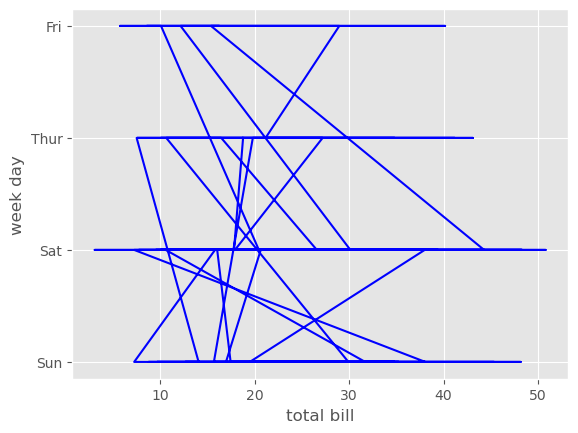

In [27]:
plt.plot(df['total_bill'],df['day'],color='blue')
plt.xlabel("total bill")
plt.ylabel("week day")
plt.show()

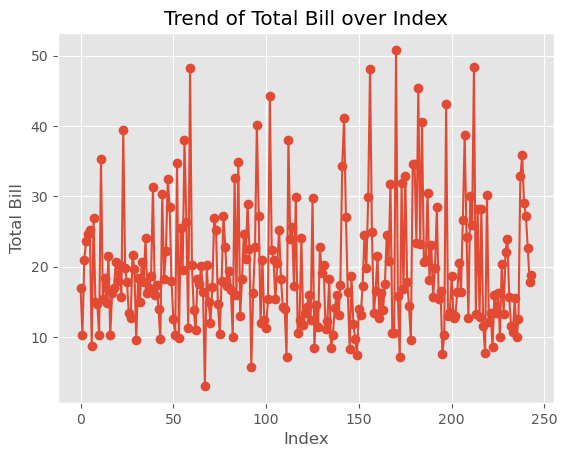

In [28]:
plt.plot(df.index, df['total_bill'], marker='o')
plt.xlabel('Index')
plt.ylabel('Total Bill')
plt.title('Trend of Total Bill over Index')
plt.grid(True)
plt.show()


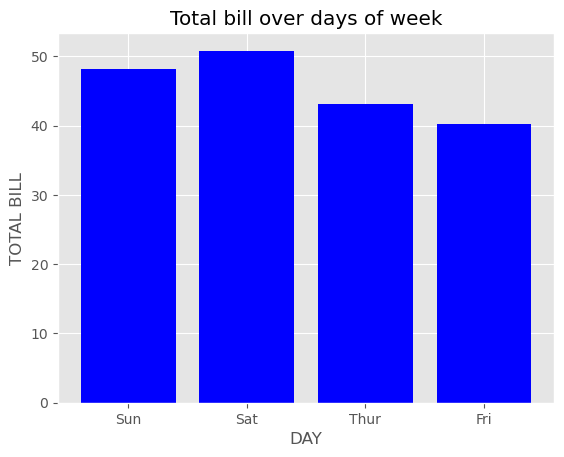

In [29]:
plt.bar(df['day'],df['total_bill'],color='blue')
plt.title("Total bill over days of week")
plt.xlabel("DAY")
plt.ylabel("TOTAL BILL")
plt.show()

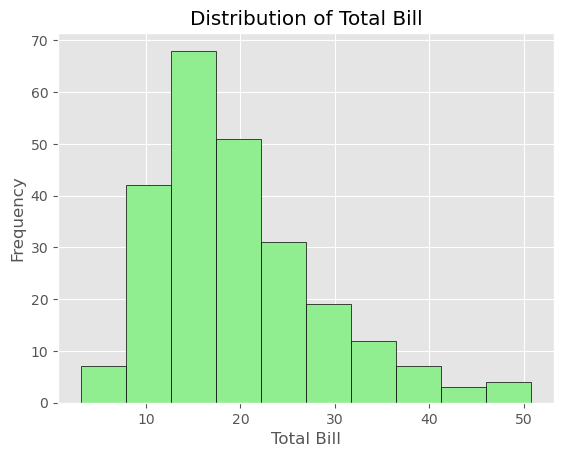

In [30]:
plt.hist(df['total_bill'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bill')
plt.show()

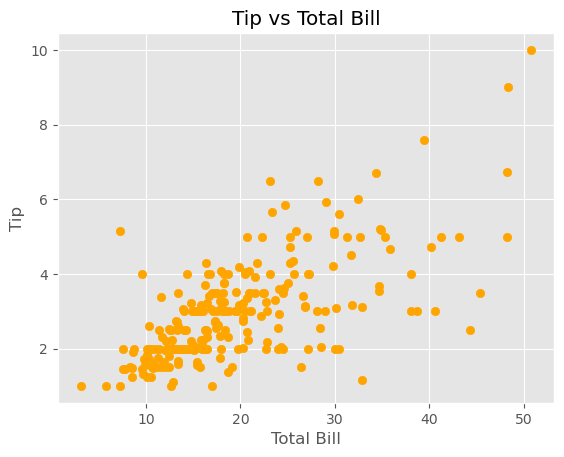

In [31]:
plt.scatter(df['total_bill'], df['tip'], color='orange')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs Total Bill')
plt.show()

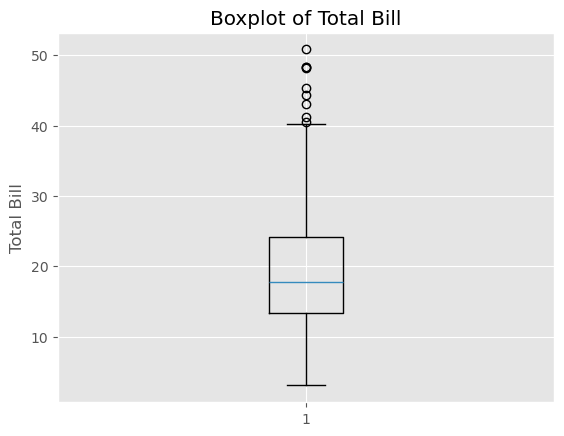

In [32]:
plt.boxplot(df['total_bill'])
plt.ylabel('Total Bill')
plt.title('Boxplot of Total Bill')
plt.show()

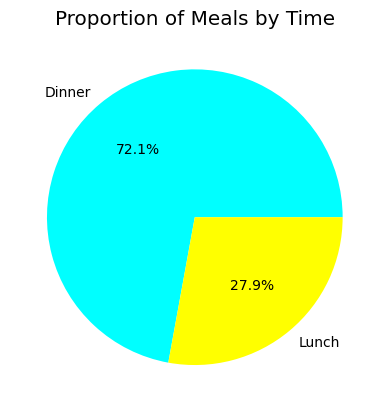

In [33]:
time_counts = df['time'].value_counts()
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', colors=['cyan','yellow'])
plt.title('Proportion of Meals by Time')
plt.show()

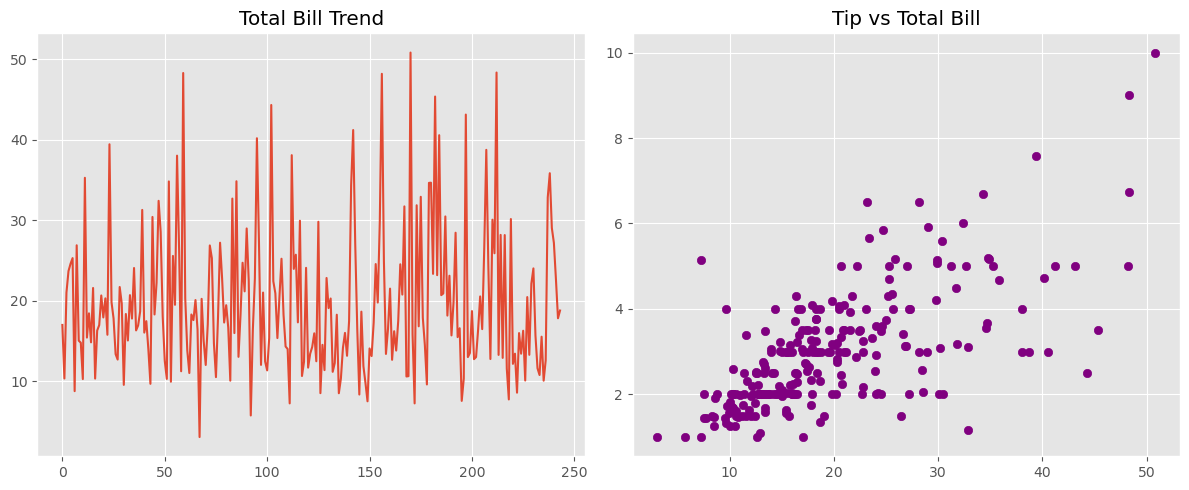

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(df.index, df['total_bill'])
plt.title('Total Bill Trend')
plt.subplot(1,2,2)
plt.scatter(df['total_bill'], df['tip'], color='purple')
plt.title('Tip vs Total Bill')
plt.tight_layout()
plt.show()